# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_crypto = 1.2
eth_crypto = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price, which means look for information in the data.You need to index. 
btc_response = requests.get(btc_url).json() 
btc_price = btc_response["data"]['1']['quotes']['USD']['price']
btc_price


# # Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]['1027']['quotes']['USD']['price']
eth_price
# # Compute current value of my crpto
btc_value =btc_price * btc_crypto
btc_value
eth_value = eth_price * eth_crypto
eth_value

# # Print current crypto wallet balance
print(f"The current value of your {btc_crypto} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_crypto} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $13591.14
The current value of your 5.3 ETH is $1944.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_shares = {
        "shares": [50,200]
}

tickers = ['SPY', 'AGG']
df_shares = pd.DataFrame(my_shares, index=tickers)
df_shares


,shares
SPY,50
AGG,200


In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [8]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
    
    
).df

# Preview DataFrame
df_portfolio


AGG                                      SPY  \
                             open    high    low    close   volume    open   
2020-10-09 00:00:00-04:00  117.65  117.74  117.5  117.705  2750029  345.56   

                                                             
                             high     low   close    volume  
2020-10-09 00:00:00-04:00  347.35  344.89  346.84  45969566

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.705
Current SPY closing price: $346.84


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of share
print(f"The current value of your {spy_close_price} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {agg_close_price} AGG shares is ${my_agg_value:0.2f}")

The current value of your 346.84 SPY shares is $17342.00
The current value of your 117.705 AGG shares is $23541.00


### Savings Health Analysis

In [12]:
# Set monthly household income
household_income = [btc_value + eth_value, my_spy_value + my_agg_value,]

# Create savings DataFrame
df_savings = pd.DataFrame(household_income, columns =["amount"], index = ["crypto", "shares"])


# Display savings DataFrame
display(df_savings)

,amount
crypto,15536.028
shares,40883.000


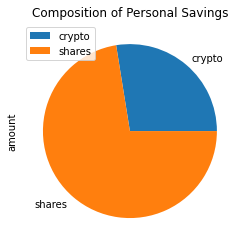

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = float(df_savings.sum())
total_amount_savings
# Validate saving health
if total_amount_savings > emergency_fund:
    print("You are good. Still with money")
    
elif total_amount_savings == emergency_fund:
    print("Perfect, you have three times your monthly expenses!!! Way to go")
    
    
else:
    print(f"You are ${(emergency_fund - total_amount_savings)} away from your finacial goal" )

You are good. Still with money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['SPY','AGG']

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)   

In [19]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986359,1.005300,1.017040,0.997544,0.994814,1.005181,1.006128,1.003584,0.997310,1.000895,...,1.008648,0.993691,0.992082,0.998885,0.997553,1.009237,1.010348,1.001974,0.990541,1.006937
2,0.979681,1.022755,1.015067,1.002199,1.001236,1.008251,1.001546,1.008507,1.006006,1.002153,...,1.009904,0.992454,0.989598,1.002159,0.988022,1.012070,1.012596,1.011838,0.992587,1.016378
3,0.976404,1.021395,1.009845,0.978591,1.012630,1.003372,1.016677,1.012028,1.003603,1.011260,...,0.995468,1.016264,0.982848,0.990454,1.000094,1.007835,1.012456,1.015230,0.996277,1.018302
4,0.976041,1.022290,1.007606,0.980138,1.013400,1.022151,1.010410,1.018897,1.010316,1.007672,...,1.004792,1.019730,0.972256,0.990827,1.022020,0.995915,1.006928,1.014089,1.004053,1.022553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.568889,6.074019,19.555982,9.887239,5.472738,2.271493,12.953587,6.535012,10.777297,6.002810,...,19.952037,17.318094,6.595515,3.753729,5.069346,17.811560,12.371607,5.943858,3.964818,21.223523
7557,5.564382,6.014529,19.357849,9.812781,5.451404,2.240934,13.012063,6.562716,10.770503,6.003099,...,19.770014,17.379004,6.641835,3.761336,5.034619,17.687467,12.416625,5.946067,3.982979,21.428667
7558,5.572847,6.041433,19.432068,9.857027,5.432910,2.252777,13.070418,6.622727,10.824010,5.999354,...,19.672846,17.557074,6.635320,3.796769,5.069822,17.716043,12.440554,5.930500,4.056591,21.469695
7559,5.550710,6.031837,19.516250,9.964185,5.404521,2.244631,13.013342,6.624802,10.672432,5.975370,...,19.578327,17.581855,6.610650,3.795677,5.075260,17.967122,12.514377,5.949839,4.070030,21.346037


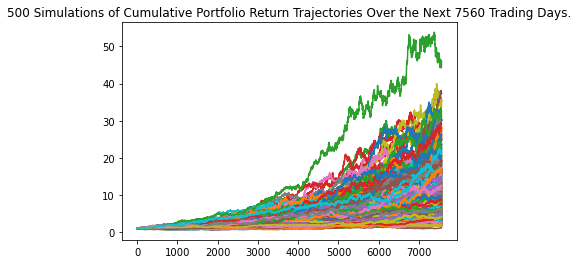

In [21]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

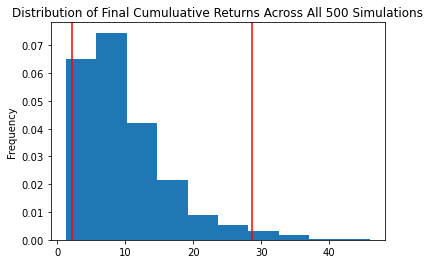

In [22]:
# Plot probability distribution and confidence intervals
dis_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(sum_stat)

count           500.000000
mean              9.933447
std               6.739504
min               1.223998
25%               5.174682
50%               8.157464
75%              12.601032
max              46.029566
95% CI Lower      2.075493
95% CI Upper     28.569650
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stat[8]*20000,2)
ci_upper = round(sum_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41509.87 and $571393.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stat[8]*30000,2)
ci_upper = round(sum_stat[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62264.8 and $857089.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)   

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002265,0.994354,0.996026,0.996307,1.003895,1.003269,0.998992,0.990672,0.999453,1.004288,...,0.994947,0.999011,0.992739,1.003524,0.998134,1.001981,0.993605,1.000025,0.999200,1.003213
2,1.005887,0.990335,0.992312,0.990880,1.019050,0.984346,1.010765,0.987965,1.008136,1.007022,...,1.004615,0.992647,0.993647,1.009964,0.991095,0.996871,0.999058,1.003234,1.000643,1.009895
3,1.011943,0.991494,0.989066,0.991495,1.018830,0.983215,1.010789,0.985303,0.997736,1.008269,...,1.005409,0.980955,0.986549,0.996235,0.996612,0.981661,0.998624,0.985166,1.000927,1.020676
4,1.016068,0.994969,0.987715,0.995241,1.030266,0.976831,1.009749,0.978399,1.001461,0.996438,...,1.004235,0.971977,0.979654,0.994176,0.989758,0.975733,0.986252,0.991385,1.001130,1.028989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.943160,1.638257,2.126693,1.162595,1.577666,1.206870,1.348052,1.189817,1.680473,0.982231,...,1.163098,1.874352,1.406548,0.900121,1.701282,1.507741,1.517595,1.908942,1.528417,1.726251
1257,1.958351,1.639705,2.121408,1.153642,1.578085,1.211739,1.347427,1.193497,1.704483,0.975816,...,1.174397,1.868975,1.407178,0.893315,1.697136,1.518247,1.507231,1.939620,1.529452,1.718789
1258,1.944827,1.626188,2.112267,1.161192,1.579359,1.202620,1.354163,1.203061,1.719233,0.972161,...,1.170947,1.885072,1.406352,0.888721,1.691133,1.501985,1.520858,1.920621,1.540411,1.735290
1259,1.944027,1.625390,2.102523,1.154196,1.569497,1.217087,1.359686,1.196436,1.725316,0.978545,...,1.160378,1.893010,1.426811,0.895964,1.687404,1.510210,1.509348,1.922622,1.552773,1.734119


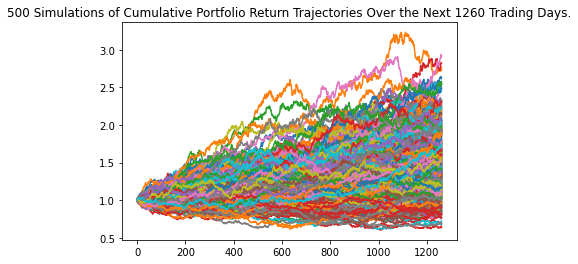

In [28]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()


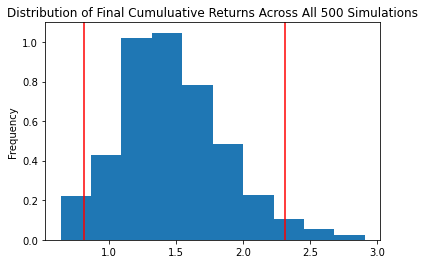

In [29]:
# Plot probability distribution and confidence intervals
distri_cumu = MC_five_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five_year)


count           500.000000
mean              1.471759
std               0.393918
min               0.637247
25%               1.194426
50%               1.417020
75%               1.698472
max               2.911152
95% CI Lower      0.813438
95% CI Upper      2.314934
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stat[8]*initial_investment,2)
ci_upper_five = round(sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $124529.6 and $1714178.99


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252 * 10
)   

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996968,1.003994,0.995645,0.999466,0.992546,0.996231,1.005457,0.994597,0.997362,1.005613,...,1.002208,0.996090,1.005778,0.996059,0.996286,1.013575,0.996935,1.009741,0.998027,0.995711
2,1.004123,1.007403,0.996708,1.001121,0.995599,1.000807,1.007518,1.005717,0.999521,1.007401,...,1.004573,1.003560,0.998640,0.979045,0.987263,1.016602,1.010149,1.024636,1.005211,0.998384
3,1.005869,1.001802,1.004303,1.012981,0.999434,0.994625,1.003266,1.012243,0.992882,1.015873,...,1.005906,0.992815,1.003808,0.984285,0.986847,1.014184,1.008614,1.025951,1.002570,0.996119
4,0.997038,0.993186,1.006235,1.013619,1.000782,0.989225,1.010690,1.011547,0.985267,1.008870,...,0.996557,1.002230,1.002521,0.979837,0.978301,1.018331,1.010467,1.034358,1.008344,1.005834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.921035,2.378844,1.821629,1.537573,1.752795,1.315993,2.247172,1.667612,4.386436,1.487868,...,1.664808,1.331974,2.553542,2.642904,1.809614,2.526974,2.082493,1.345789,1.823561,3.096287
2517,0.915189,2.370102,1.821028,1.550451,1.746692,1.317808,2.257642,1.666027,4.350033,1.489435,...,1.669876,1.323606,2.571615,2.671543,1.804507,2.525560,2.086851,1.348529,1.808935,3.077195
2518,0.919777,2.368620,1.808989,1.553134,1.747330,1.318815,2.259162,1.689006,4.354818,1.488789,...,1.670219,1.326384,2.611217,2.681390,1.802939,2.522903,2.115502,1.337306,1.800575,3.090205
2519,0.918092,2.338712,1.809397,1.563841,1.760153,1.322380,2.251437,1.690243,4.377447,1.493162,...,1.686607,1.318575,2.606769,2.682538,1.815116,2.535961,2.127644,1.326555,1.796517,3.091334


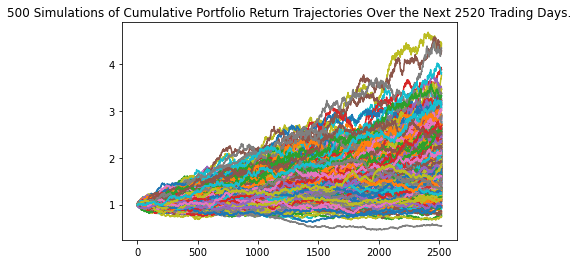

In [34]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

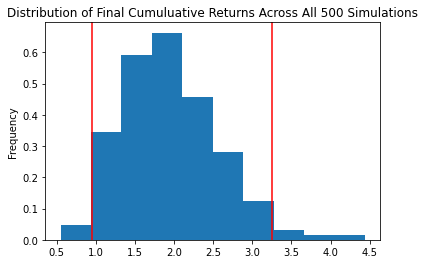

In [35]:
# Plot probability distribution and confidence intervals
distri_cumu_ten = MC_ten_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten_year)

count           500.000000
mean              1.948894
std               0.610548
min               0.547556
25%               1.518066
50%               1.882001
75%               2.295243
max               4.439217
95% CI Lower      0.950909
95% CI Upper      3.252229
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stat[8]*initial_investment,2)
ci_upper_ten = round(sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $124529.6 and $1714178.99
